# DATA CLEANER 🧼🧽🫧🚿
made by mateonation (Mateo Fernández Rivera)

In [86]:
import pandas as pd
import numpy as np
import io

#### 1. Read dirty data
We load the data

In [87]:
df=pd.read_csv('dirty_salud_fran.csv', encoding='utf-16')

print("--------- DIMENSIONS ---------")
print(df.shape)

--------- DIMENSIONS ---------
(273, 15)


In [88]:
df

,Unnamed: 0,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70.0,NaN,4.0,NaN,NaN,0,NaN,NaN,NaN,2.4,NaN,3.0,NaN,Presence
1,1,NaN,NaN,3.0,NaN,NaN,0,NaN,NaN,0.0,NaN,NaN,0.0,7.0,Absence
2,2,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0.3,NaN,NaN,NaN,Presence
3,3,NaN,1.0,4.0,128.0,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,7.0,Absence
4,4,NaN,0.0,NaN,120.0,269.0,0,NaN,NaN,1.0,0.2,1.0,1.0,3.0,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,268,NaN,NaN,NaN,140.0,192.0,0,0.0,148.0,0.0,0.4,NaN,NaN,NaN,Absence
269,269,67.0,NaN,4.0,NaN,NaN,0,NaN,NaN,NaN,NaN,2.0,3.0,3.0,Presence
270,0,42.0,NaN,4.0,NaN,NaN,0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,Absence
271,1,NaN,NaN,4.0,NaN,NaN,0,NaN,NaN,1.0,NaN,NaN,1.0,7.0,Presence


#### 2. Standarize column names
We replace spaces in column names for '_' and rewrite them in lowercase to dodge typing errors later

In [89]:
df.columns=df.columns.str.strip().str.lower().str.replace(' ', '_')

#### 3. Remove duplicates
We remove duplicated rows and reset the index

In [90]:
df=df.drop_duplicates().reset_index(drop=True)

#### 4. Correct outliers
Detect what logic values have +1000 added.
(IMPORTANT: If a numeric column has > 300 (a safe threshold for these variables), subtract 1000)

In [91]:
cols_to_check=['age','bp','cholesterol','max_hr','chest_pain_type','exercise_angina','fbs_over_120']

for col in cols_to_check:
    mask=df[col]>800
    df.loc[mask,col]=df.loc[mask,col]-1000

#### 5. Missing values
Strategy: Mean for continuous, Mode (most frequent value) for categorical.

In [92]:
nums=['age','bp','cholesterol','max_hr','st_depression','number_of_vessels_fluro']
for col in nums:
    val_medio=df[col].median() 
    df[col]=df[col].fillna(val_medio)

cats = ['sex','chest_pain_type','fbs_over_120','ekg_results','exercise_angina','slope_of_st','thallium','heart_disease']
for col in cats:
    val_frecuente=df[col].mode()[0]
    df[col]=df[col].fillna(val_frecuente)

#### 6. Final format
We ensure that columns that should be whole numbers do not have decimals.

In [93]:
df['age'] = df['age'].astype(int)
df['sex'] = df['sex'].astype(int)
df['heart_disease'] = df['heart_disease'].astype('category')

In [94]:
df

,unnamed:_0,age,sex,chest_pain_type,bp,cholesterol,fbs_over_120,ekg_results,max_hr,exercise_angina,st_depression,slope_of_st,number_of_vessels_fluro,thallium,heart_disease
0,0,70,1,4.0,130.0,248.5,0,0.0,155.0,0.0,2.4,1.0,3.0,3.0,Presence
1,1,55,1,3.0,130.0,248.5,0,0.0,155.0,0.0,0.6,1.0,0.0,7.0,Absence
2,2,55,1,4.0,130.0,248.5,0,0.0,155.0,0.0,0.3,1.0,0.0,3.0,Presence
3,3,55,1,4.0,128.0,248.5,0,0.0,155.0,0.0,0.6,1.0,0.0,7.0,Absence
4,4,55,0,4.0,120.0,269.0,0,0.0,155.0,1.0,0.2,1.0,1.0,3.0,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,268,55,1,4.0,140.0,192.0,0,0.0,148.0,0.0,0.4,1.0,0.0,3.0,Absence
269,269,67,1,4.0,130.0,248.5,0,0.0,155.0,0.0,0.6,2.0,3.0,3.0,Presence
270,0,42,1,4.0,130.0,248.5,0,0.0,155.0,0.0,0.0,1.0,0.0,3.0,Absence
271,1,55,1,4.0,130.0,248.5,0,0.0,155.0,1.0,0.6,1.0,1.0,7.0,Presence


#### 7. Conclusion
What we did was deduplicate rows, correct excesive values and fill missing values with stadistic values. What can we do now? To continue it's important to change the goal, from now on we are not "cleaning trash" but "refining quality" for the machine learning algorithm to learn the data better.

##### EXTRA.1 Encoding 'heart disease' column
Neuronal networks does not understand words like "presence" or "absence". They need to read numbers like 1 or 0 to be trained. So for the 'heart_disease' column we are going to map 'absence' values to 0 (healthy) and 'presence' values to 1 (sick)

In [95]:
targetMap={
    'Absence':0, 
    'Presence':1
}
df['heart_disease']=df['heart_disease'].map(targetMap)
df['heart_disease'].head()

0    1
1    0
2    1
3    0
4    0
Name: heart_disease, dtype: category
Categories (2, int64): [0, 1]

##### EXTRA.2 Optimizing data types (Casting)
For example, having values in 'sex' column as float wastes more energy and is conceptually ugly. It's better to keep these values as integers in those columns.

In [96]:
cols_ent=['sex','bp','max_hr','number_of_vessels_fluro','chest_pain_type','fbs_over_120','exercise_angina','slope_of_st','heart_disease']

#We fill any residual NaN that could have surged during the mapping
for col in cols_ent:
    df[col]=df[col].fillna(0).astype(int)

df[['sex','bp','max_hr','number_of_vessels_fluro','chest_pain_type','fbs_over_120','exercise_angina','slope_of_st','heart_disease']].head()

,sex,bp,max_hr,number_of_vessels_fluro,chest_pain_type,fbs_over_120,exercise_angina,slope_of_st,heart_disease
0,1,130,155,3,4,0,0,1,1
1,1,130,155,0,3,0,0,1,0
2,1,130,155,0,4,0,0,1,1
3,1,128,155,0,4,0,0,1,0
4,0,120,155,1,4,0,1,1,0


#### 8. Data statistics and frequencies

In [97]:
print(df.describe().T)

                         count        mean        std    min    25%    50%  \
unnamed:_0               273.0  133.032967  78.896542    0.0   65.0  133.0   
age                      273.0   54.622711   6.904852   29.0   54.0   55.0   
sex                      273.0    0.835165   0.371713    0.0    1.0    1.0   
chest_pain_type          273.0    3.600733   0.760901    1.0    3.0    4.0   
bp                       273.0  131.300366  13.454904  100.0  130.0  130.0   
cholesterol              273.0  249.642857  35.878160  126.0  246.0  248.5   
fbs_over_120             273.0    0.150183   0.357907    0.0    0.0    0.0   
ekg_results              273.0    0.538462   0.886679    0.0    0.0    0.0   
max_hr                   273.0  153.234432  16.337997   71.0  154.0  155.0   
exercise_angina          273.0    0.186813   0.390477    0.0    0.0    0.0   
st_depression            273.0    0.829304   0.928601    0.0    0.4    0.6   
slope_of_st              273.0    1.307692   0.542847    1.0    

In [98]:
print(df.mode().iloc[0])

unnamed:_0                   0.0
age                         55.0
sex                          1.0
chest_pain_type              4.0
bp                         130.0
cholesterol                248.5
fbs_over_120                 0.0
ekg_results                  0.0
max_hr                     155.0
exercise_angina              0.0
st_depression                0.6
slope_of_st                  1.0
number_of_vessels_fluro      0.0
thallium                     3.0
heart_disease                0.0
Name: 0, dtype: float64


In [99]:
count=df['heart_disease'].value_counts()
percentage=df['heart_disease'].value_counts(normalize=True)*100
print(pd.DataFrame({
    'Total':count,
    'Porcentaje (%)':percentage
    })
)

               Total  Porcentaje (%)
heart_disease                       
0                152       55.677656
1                121       44.322344


In [100]:
print(df['sex'].value_counts())

sex
1    228
0     45
Name: count, dtype: int64


#### 9. Graphs and basic visualization

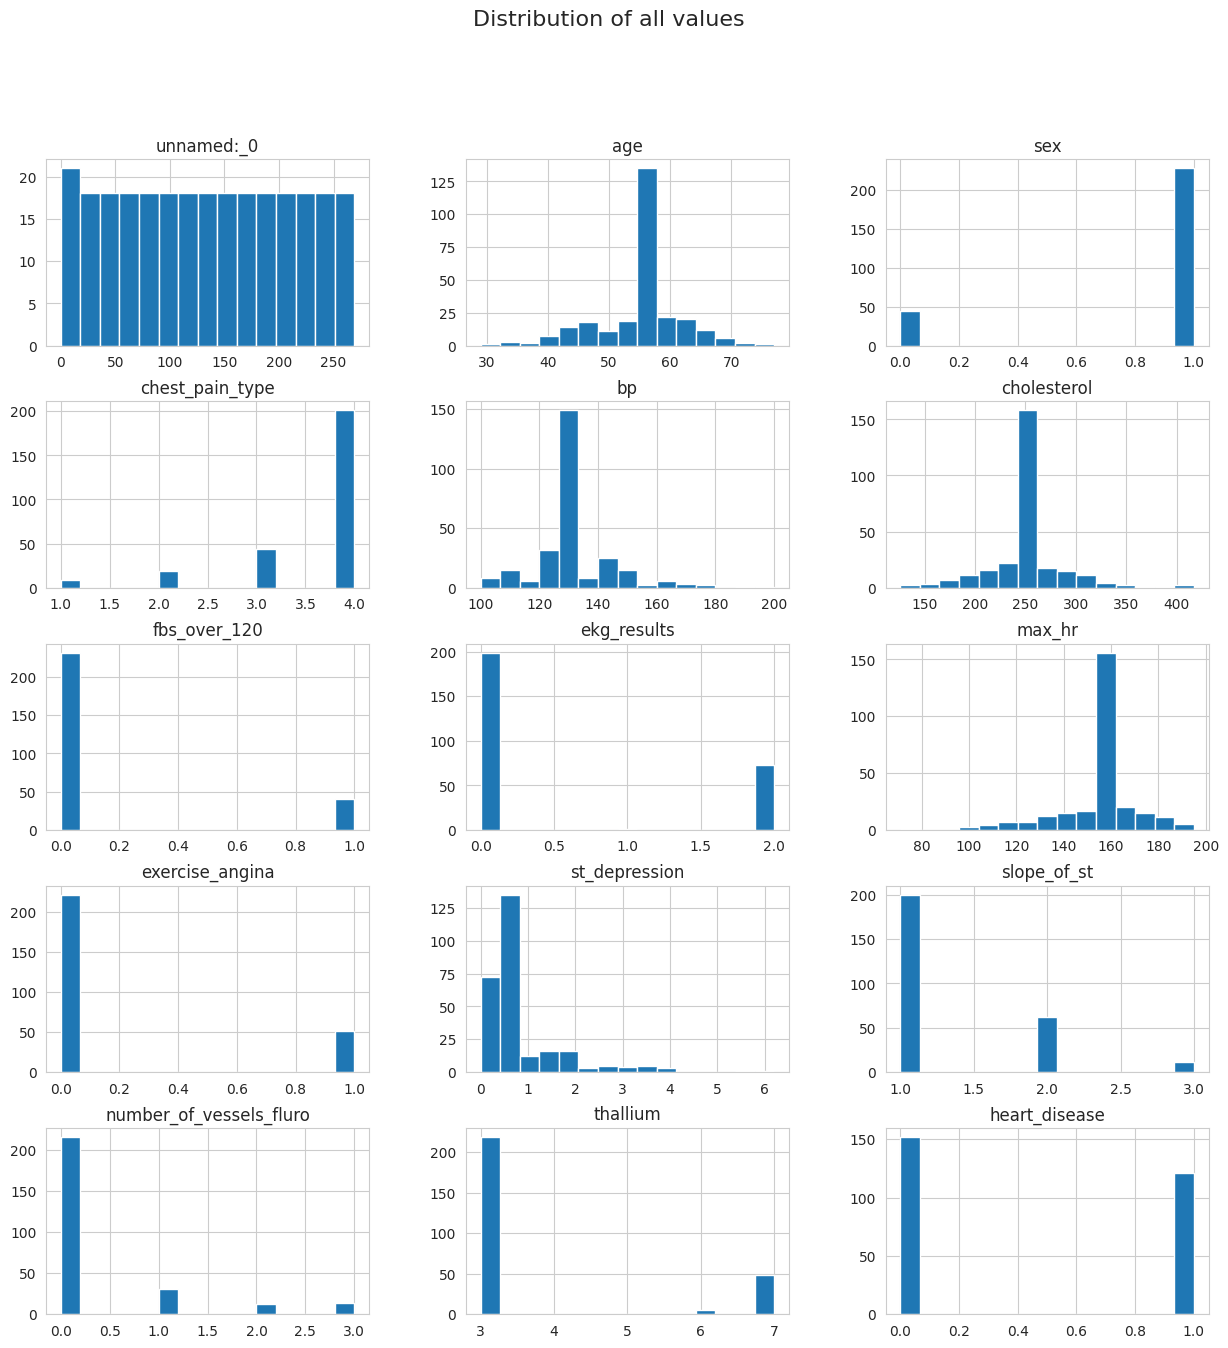

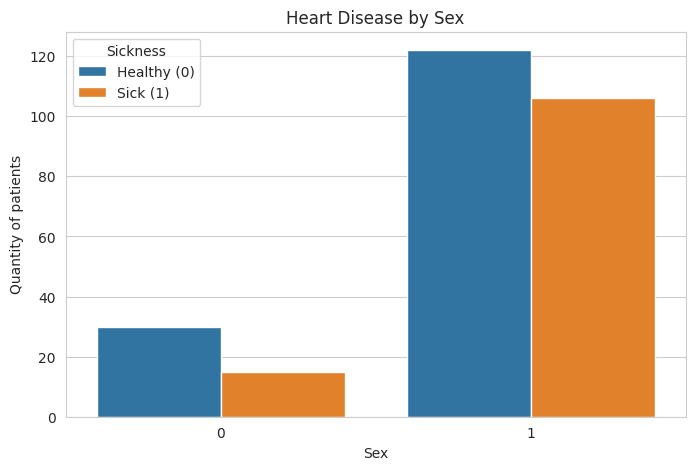

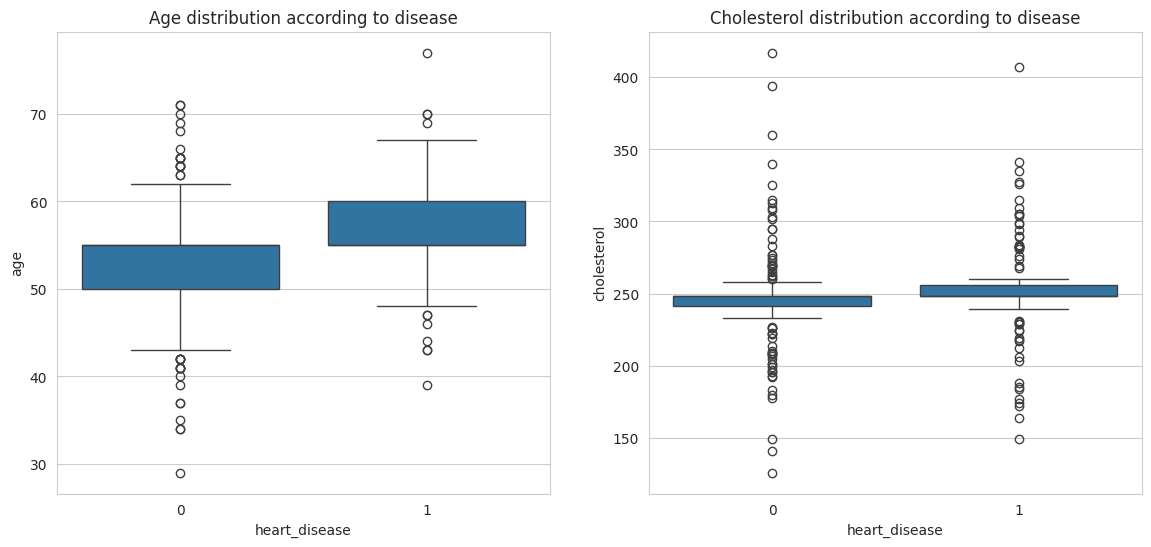

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

df.hist(bins=15, figsize=(15, 15), layout=(5, 3))
plt.suptitle("Distribution of all values", fontsize=16)
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sex', hue='heart_disease')
plt.title("Heart Disease by Sex")
plt.xlabel("Sex")
plt.ylabel("Quantity of patients")
plt.legend(title='Sickness', labels=['Healthy (0)', 'Sick (1)'])
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=df, x='heart_disease', y='age', ax=ax[0])
ax[0].set_title("Age distribution according to disease")

sns.boxplot(data=df, x='heart_disease', y='cholesterol', ax=ax[1])
ax[1].set_title("Cholesterol distribution according to disease")

plt.show()

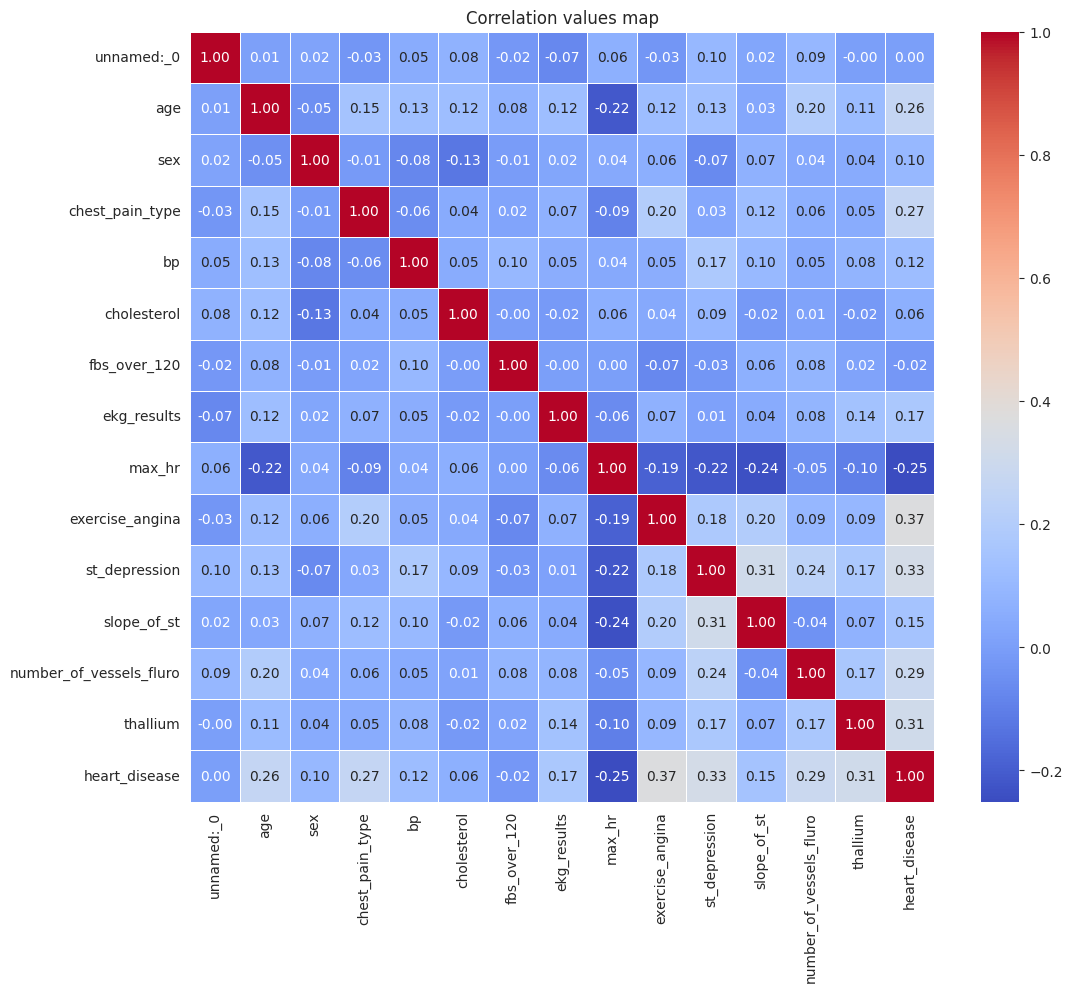

In [102]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation values map")
plt.show()

### 10. END (export to `.csv`)

In [103]:
filename='salud_dataset_cleaned-MATEOFDEZ.csv'
df.to_csv(filename, index=False, encoding='utf-8')
print('Cleaned dataset saved to:',filename)

Cleaned dataset saved to: salud_dataset_cleaned-MATEOFDEZ.csv
